Escrevi esse código em Python usando o Jupyter notebook.

Primeiro importo as bibliotecas que vou usar.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Para os cálculos vou precisar das seguintes constantes (seus valores foram retirados do livro):

$H_0 = 70 \;km/s/Mpc $

$c = 299792 \;km/s $

$\Omega_{r, 0} = 8{,}4 \cdot 10^{-5}$

$\Omega_{m, 0} = 0{,}3$

$\Omega_{\Lambda, 0} = 0{,}7$

In [6]:
H0 = 70 #km/s/Mpc
c0 = 299792 #km/s
Or = 8.4e-5
Om = 0.3
Ol = 0.7

Vou converer as unidades de km/s para Mpc/Ganos:

$1Mpc = 3.086\cdot 10^{19} \;km$

$1Gano = 3.154\cdot 10^{16} \;s$

In [7]:
H = H0*3.154e16/3.086e19 #H0 em Ganos
c = c0*3.154e16/3.086e19 #c em Mpc/Gano

Partindo da equação (6.7) do livro da Barbara Ryden e assumindo que o Universo é plano, e portanto $\Omega_0 = 1$, temos a seguinte equação diferencial para o fator de escada:

$$\dot a = H_0 \sqrt{\frac{\Omega_{r, 0}}{a^2} + \frac{\Omega_{m,0}}{a} + \Omega_{\Lambda, 0} a^2}$$

Vou intergar numericamente essa equação aproximando o diferencial de tempo por um pequeno intervalo de tempo:

$$ a(t + dt) = a(t) + \dot a \cdot dt \\ a(t + \Delta t) \approx a(t) +  \dot a \cdot \Delta t$$

Vou calcular $a(t)$ desde $t = 0$ até $t = t_0$, sendo $a(t_0) = 1$. Não posso usar $a(0) = 0$ pois estaria dividindo por zero na eq. (6.7), então considero que $a(0)$ possui um valor pequeno mas diferente de zero.

Ao invez de considerar um $\Delta t$ constante durante toda a integração vou fazer o intervalo de tempo variar proporcionamente a $a(t)$, isso vai me permitir calcular o fator de escala em um intervalo maior de ordens de grandezas.

In [15]:
#Parâmetros da  integração
# proporção entre a(t) e dt e tambem o tamanho inicial 
# para os vetores que guardam os valores de t e a(t)
n0 = n =  int(1e4)   
a = np.zeros(n)
t = np.zeros(n)

a[0] = 1e-12    #valor de a em t=0
dt = a[0]/n0    #dt proporcial a a(t)

i = 0
a_max = 10
# integro até obter o valor final de a(t)
while a[i] < a_max:
    i += 1
    # se não houver mais espaço dobra o tamanho dos vetores que guardam os dados
    if i + 1 >= n:
        n1 = int(2*n)
        a1 = np.zeros(n1)
        t1 = np.zeros(n1)
        a1[:n] = a
        t1[:n] = t
        n = n1
        a = a1
        t = t1
    
    # calcula o valor de da/dt
    da = H*np.sqrt(Or/a[i-1]**2 + Om/a[i-1] + Ol*a[i-1]**2)
    
    # atualiza os valores de a(t) e t
    a[i] = a[i-1] + da * dt
    t[i] = t[i-1] + dt
    
    # recalcula dt
    dt = a[i]/n0

# retira as posições não utilizadas
a = a[:i+1]
t = t[:i+1]

Agora tenho solução de $a(t)$ guardada na forma de dois vetores: $t_i$ e $a_i = a(t_i)$

Vou definir uma função pra encontrar em qual posição do vetor está o valor que procuro.

In [10]:
def encontra(a, a0):
    i = np.abs(a - a0).argmin()
    return i    

$t_0$, a idade atual do Universo, está guardada na posição $i$ do vetor tempo tal que $a_i = a(t_0) = 1$.

In [19]:
i = encontra(a, 1)
t0 = t[i]
a0 = a[i]
print('t0 = {:.3f} Ganos'.format(t0))
print('a(t0) = {:.7f}'.format(a0))

t0 = 13.470 Ganos
a(t0) = 1.0000004


Agora vou encontrar os tempos de iguadade entre radiação matéria e matéria lambda, pra isso vou calcular quais eram os valores do fator de escala nesses tempos.

$$\frac{\Omega_{r, 0}}{a(t_{rm})^4} = \frac{\Omega_{m, 0}}{a(t_{rm})^3} \\ 
a(t_{rm}) = \frac{\Omega_{r, 0}}{\Omega_{m, 0}} = 2.8 \cdot 10^{-4}$$

$$\frac{\Omega_{m, 0}}{a(t_{\Lambda m})^3} = \Omega_{\Lambda, 0} \\ 
a(t_{\Lambda m}) = \sqrt[3]{\frac{\Omega_{m, 0}}{\Omega_{\Lambda, 0}}} = 0.754$$

In [30]:
trm = t[encontra(a, 2.8e-4)]
tlm = t[encontra(a, 0.754)]
print('Igualdade radiação matéria:\ntrm = {:.2e} Ganos\n'.format(trm))
print('Igualdade matéria lambda:\ntlm = {:.2f} Ganos'.format(tlm))

Igualdade radiação matéria:
trm = 4.67e-05 Ganos

Igualdade matéria lambda:
tlm = 9.81 Ganos


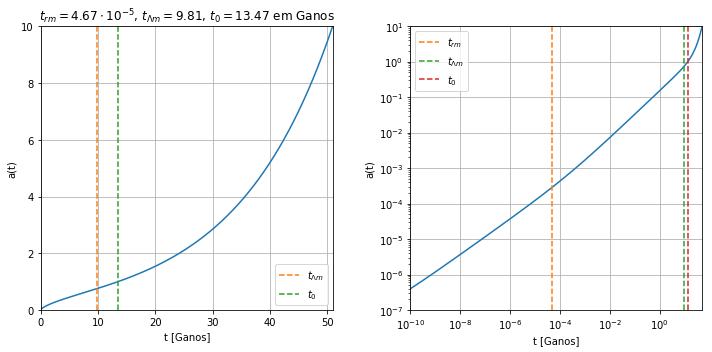

In [58]:
fig = plt.figure(figsize=(10,5))


fig.add_subplot(121)
plt.plot(t, a)
linha1, = plt.plot([tlm, tlm], [1e-7, a_max], '--', label = r'$t_{\Lambda m}$')
linha2, = plt.plot([t0, t0], [1e-7, a_max], '--', label = r'$t_0$')
plt.legend(handles=[linha1, linha2])
plt.xlim(1e-10, t[-1])
plt.ylim(1e-7, a_max)
plt.title(r'$t_{rm} = 4.67 \cdot 10^{-5}$, $t_{\Lambda m} = 9.81$, $t_0 = 13.47$ em Ganos')
plt.xlabel('t [Ganos]')
plt.ylabel('a(t)')
plt.grid()

fig.add_subplot(122)

plt.plot(t, a)
plt.plot([1e-10, ])
linha1, = plt.plot([trm, trm], [1e-7, a_max], '--', label = r'$t_{rm} $')
linha2, = plt.plot([tlm, tlm], [1e-7, a_max], '--', label = r'$t_{\Lambda m}$')
linha3, = plt.plot([t0, t0], [1e-7, a_max], '--', label = r'$t_0$')
plt.legend(handles=[linha1, linha2, linha3])
plt.xlim(1e-10, t[-1])
plt.ylim(1e-7, a_max)
plt.xscale('log')
plt.yscale('log')
# plt.title('a(t) em escala log-log')
plt.xlabel('t [Ganos]')
plt.ylabel('a(t)')
plt.grid()

plt.tight_layout()
plt.show()

Agora vou calcular $d_P(t_0)$ usando a equação:

$$d_P(t_0) = c \int_{t_e}^{t_0} \frac{dt}{a(t)}$$

In [67]:
dp = np.zeros(a.shape)
i0 = encontra(a, 1)

for i in range(i0, 0 , -1):
    dt = t[i] - t[i-1]
    dp[i-1] = dp[i] + c*dt/a[i]

E agora tenho o valor de $d_P(t_0)$ para uma fonte que emitiu luz quando o fator de escala era $a(t_e)$. 
A distância de horizonte será a distância própria de uma fonte que emitiu em $t = 0$.

In [68]:
print('dh(t0) = {:.0f} Mpc'.format(dp[0]))

dh(t0) = 13896 Mpc


Enconto o redshift respectivo usando:

$$1 + z = \frac{1}{a(t_e)}$$

Também encontro a distância angular ($d_A$) e luminoza ($d_L$) com as seguinte relações:

$$d_A = \frac{d_P(t_0)}{1+z}, \qquad d_L = d_P(t_0)(1+z)$$

In [69]:
z = 1/a - 1
da = dp/(1+z)
dl = dp*(1+z)

Abaixo estão os gráficos de $d_P(t_0)$, $d_A(t_0)$ e $d_L(t_0)$ em função de $z$.

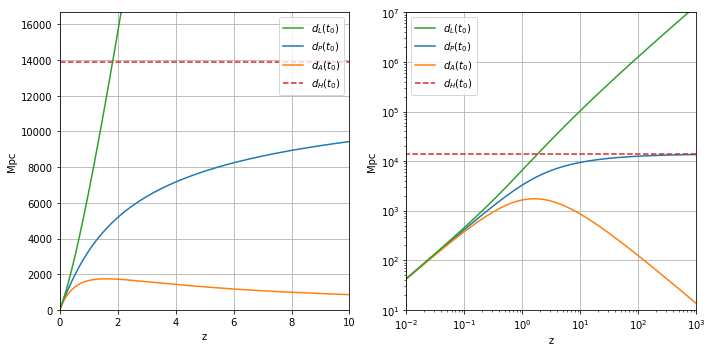

In [74]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
linha1, = plt.plot(z, dp, label = r'$d_P(t_0)$')
linha2, = plt.plot(z, da, label = r'$d_A(t_0)$')
linha3, = plt.plot(z, dl, label = r'$d_L(t_0)$')
linha4, = plt.plot([0, 1e4], [dp[0], dp[0]], '--', label = r'$d_H(t_0)$')

plt.legend(handles = [linha3, linha1, linha2, linha4])
plt.xlim(0, 10)
plt.ylim(0, 1.2*dp[0])
plt.xlabel('z')
plt.ylabel('Mpc')
plt.grid()

fig.add_subplot(122)
linha1, = plt.plot(z, dp, label = r'$d_P(t_0)$')
linha2, = plt.plot(z, da, label = r'$d_A(t_0)$')
linha3, = plt.plot(z, dl, label = r'$d_L(t_0)$')
linha4, = plt.plot([1e-12, 1e4], [dp[0], dp[0]], '--', label = r'$d_H(t_0)$')

plt.legend(handles = [linha3, linha1, linha2, linha4])
plt.xlim(1e-2, 1e3)
plt.ylim(10, 1e7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('Mpc')
plt.grid()

plt.tight_layout()
plt.show()